In [52]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn = '../data/nwmv21_nwis.nc'
ds = nc.Dataset(fn)

In [2]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE: OUTPUT FROM WRF-Hydro v5.2.0-beta2
    featureType: timeSeries
    proj4: +proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1=30.0 +lat_2=60.0 +lat_0=40.0 +lon_0=-97.0 +x_0=0 +y_0=0 +k_0=1.0 +nadgrids=@
    station_dimension: feature_id
    cdm_datatype: Station
    Conventions: CF-1.6
    dimensions(sizes): feature_id(18495), time(367439)
    variables(dimensions): int32 feature_id(feature_id), float32 latitude(feature_id), float32 longitude(feature_id), float32 streamflow(feature_id, time), int32 time(time)
    groups: 

In [3]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 feature_id(feature_id)
    long_name: Reach ID
    comment: NHDPlusv2 ComIDs within CONUS, arbitrary Reach IDs outside of CONUS
    cf_role: timeseries_id
    _ChunkSizes: 1
unlimited dimensions: 
current shape = (18495,)
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(feature_id)
    long_name: Feature latitude
    standard_name: latitude
    units: degrees_north
    _ChunkSizes: 1
unlimited dimensions: 
current shape = (18495,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(feature_id)
    long_name: Feature longitude
    standard_name: longitude
    units: degrees_east
    _ChunkSizes: 1
unlimited dimensions: 
current shape = (18495,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 streamflow(feature_id, time)
    coordinates: latitude longitude
    grid_mapping: 

In [41]:
gage_nc = ds['feature_id'][:]
location = np.where(gage_nc.data==23252011)
np.where(gage_nc.data==23252011)

In [119]:
data = pd.DataFrame(ds["streamflow"][location].data).transpose()
data.columns = ["streamflow"]

<AxesSubplot:>

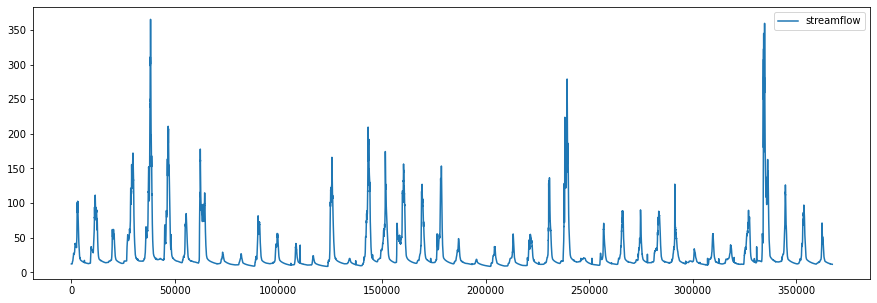

In [120]:
data.plot(figsize=(15,5))

In [130]:
time_nc = ds["time"][:].data*60
data["time"] = time_nc
data['time'] = pd.to_datetime(data['time'], unit='s')
data.to_csv('testMalad_delete.csv')